## Simulation of orbital movement

We simulate the orbital movement of a body around the sun, just by using its gravitational force.

In [17]:
import numpy as np 
import matplotlib.pyplot as plt

In order to automate and better compare different parameters, we implement a function for a given starting position and velocity (relative to Earth's position and velocity).

In [18]:
def simulateEarth(position=[0, 1], velocity=[1, 0], 
                  dt=1, years=1, ax=None):
    """Simulate the rotation of an object around the sun.
    
    Parameters
    ----------
    position : [x, y]
        position in medium Earth 
    velocity : [x, y]
        velocity in Earth velocities
    dt : float
        time increment (in seconds)
    year : int
        number of years to compute
    ax : mpl.axis
        axis to plot in (if not, create new)   
    """
    mSun = 1.989e30  # mass of the sun
    G = 6.673e-11  # unit gravitation constant
    v0 = 29.78e3 # Earth velocity
    r0 = 149e9  # Earth 
    pos = np.array(position) * r0
    v = np.array(velocity) * v0
    secondsPerDay = 60*60*24
    nt = years*365 // dt
    dt *= secondsPerDay  # one day
    POS = np.zeros((nt, 2))
    for i in range(nt):
        POS[i, :] = pos
        pos += v * dt
        a = -G * mSun * pos / np.linalg.norm(pos)**3
        v += a * dt

    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))

    ax.plot(0, 0, "y*", markersize=6)
    ax.plot(POS[:, 0]/r0, POS[:, 1]/r0, "-", lw=1)
    ax.plot(POS[0, 0]/r0, POS[0, 1]/r0, "kd")
    ax.grid(True)
    ax.set_aspect(1.0)
    ax.set_xlabel("x [Earth radii]")
    ax.set_ylabel("y [Earth radii]")
    # return POS

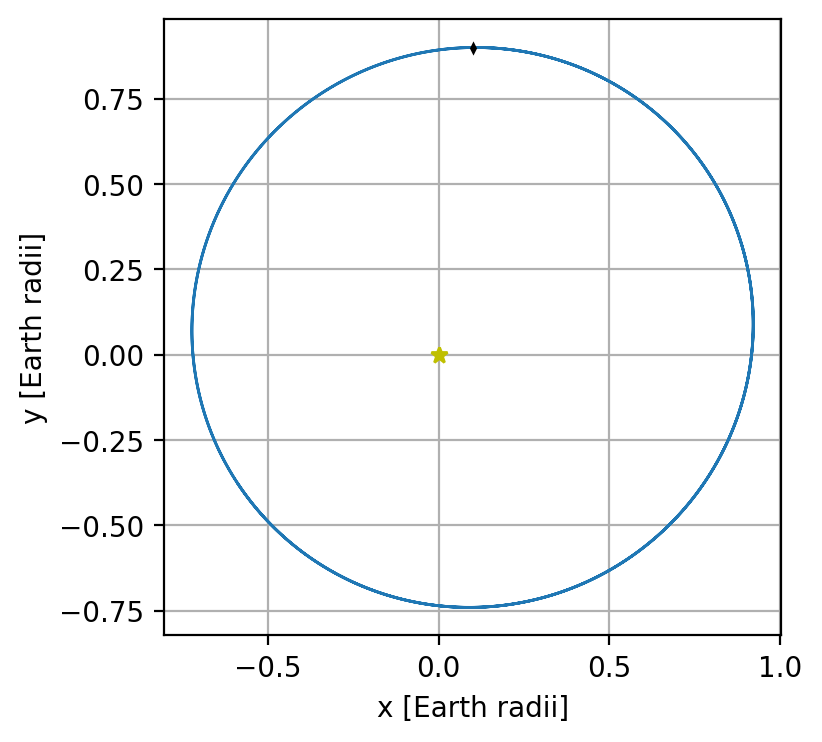

In [19]:
simulateEarth(position=[0.1, 0.9], years=2)

### Different starting position (distance)

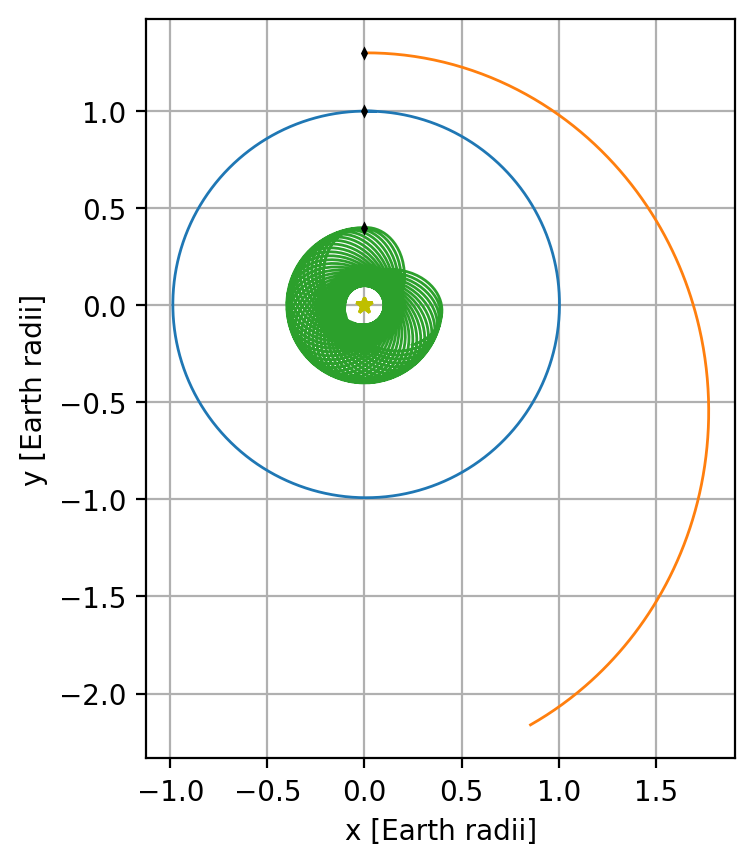

In [20]:
fig, ax = plt.subplots()
simulateEarth(ax=ax)
simulateEarth(ax=ax, position=[0, 1.3])
simulateEarth(ax=ax, position=[0, 0.4], years=5)

### Different starting velocity

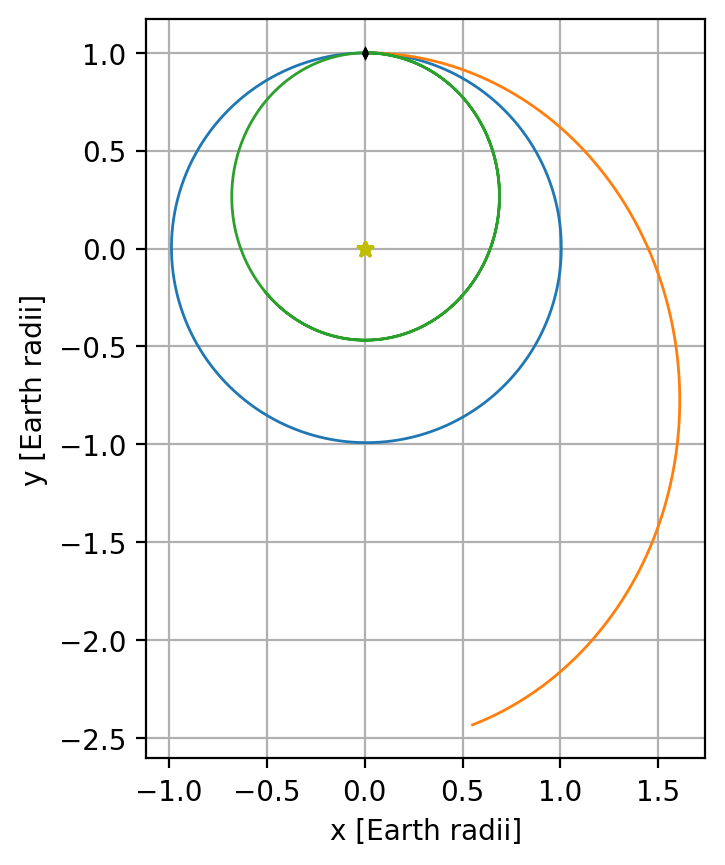

In [21]:
fig, ax = plt.subplots()
simulateEarth(ax=ax)
simulateEarth(ax=ax, velocity=[1.2, 0])
simulateEarth(ax=ax, velocity=[0.8, 0])

In [25]:
a = 1
b = np.arange(10)

### Different starting positions

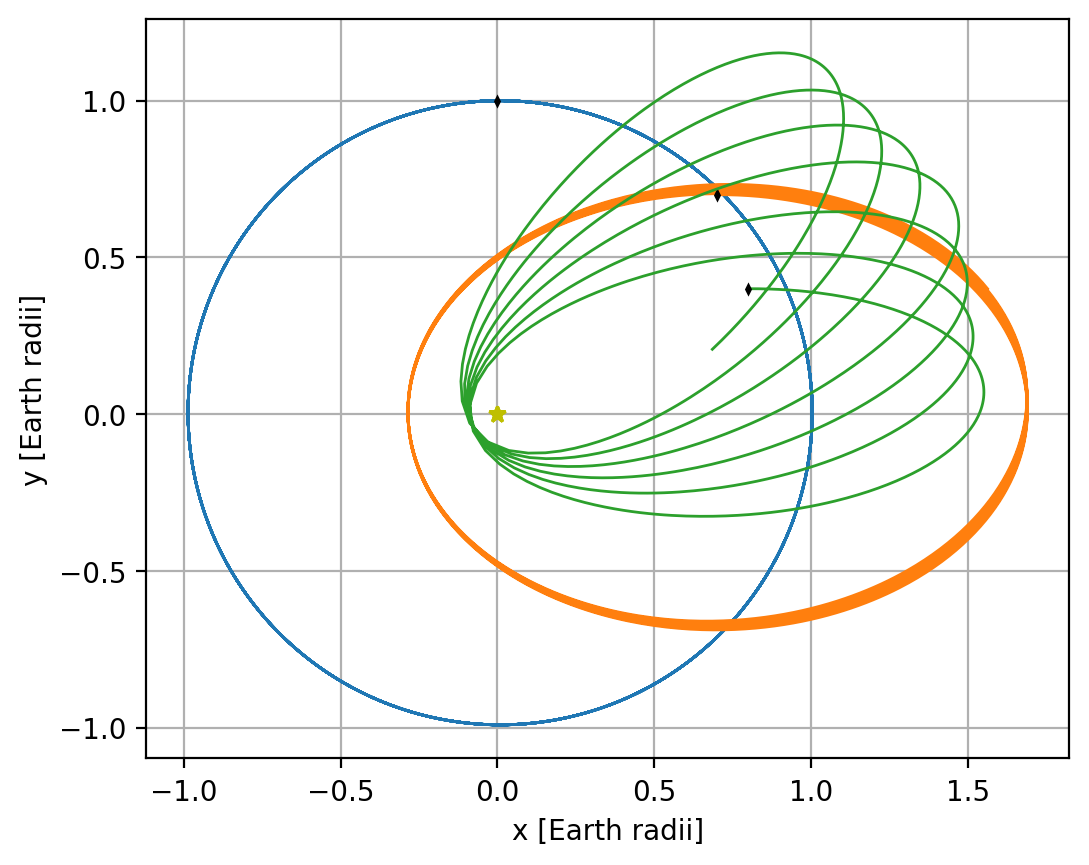

In [22]:
fig, ax = plt.subplots()
simulateEarth(ax=ax, years=10)
simulateEarth(ax=ax, position=[0.7, 0.7], years=10)
simulateEarth(ax=ax, position=[0.8, 0.4], years=5)

### Comets passing the solar system

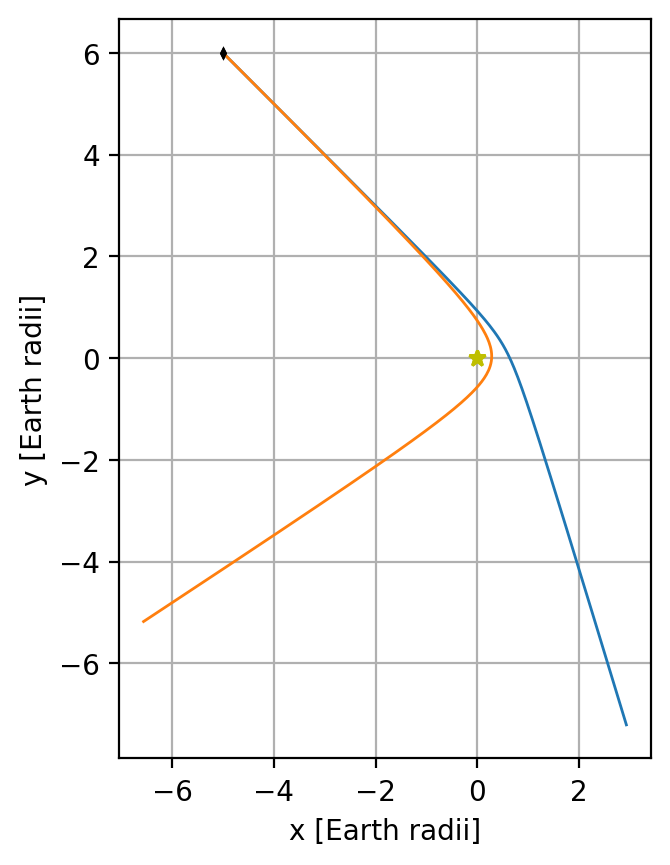

In [23]:
fig, ax = plt.subplots()
simulateEarth(ax=ax, position=[-5, 6], velocity=[1.7, -1.7])
simulateEarth(ax=ax, position=[-5, 6], velocity=[0.8, -0.8], years=2)